# Comparing vector spaces

Let's compare the vector embeddings from different models. We will use the following models:

- Word2Vec, trained on the Google News dataset
- OpenAI text-embedding-ada002


In [2]:
# Load in vectors from openai and googlenews
import json

with open('vectors_word2vec-google-news.json') as f:
    vectors_word2vec = json.load(f)
    
with open('vectors_openai_ada.json') as f:
    vectors_ada = json.load(f)

vectors_word2vec["computer"]

[0.107421875,
 -0.201171875,
 0.123046875,
 0.2119140625,
 -0.09130859375,
 0.216796875,
 -0.1318359375,
 0.0830078125,
 0.2021484375,
 0.0478515625,
 0.03662109375,
 -0.0245361328125,
 0.02392578125,
 -0.16015625,
 -0.026123046875,
 0.09716796875,
 -0.0634765625,
 0.1845703125,
 0.1708984375,
 -0.1630859375,
 -0.109375,
 0.1494140625,
 -0.00046539306640625,
 0.09619140625,
 0.1689453125,
 0.0026092529296875,
 0.08935546875,
 0.06494140625,
 0.03564453125,
 -0.0693359375,
 -0.146484375,
 -0.12109375,
 -0.2275390625,
 0.0245361328125,
 -0.12451171875,
 -0.318359375,
 -0.220703125,
 0.130859375,
 0.03662109375,
 -0.036376953125,
 -0.11328125,
 0.1953125,
 0.09765625,
 0.126953125,
 0.06591796875,
 0.0693359375,
 0.01025390625,
 0.17578125,
 -0.1689453125,
 0.00121307373046875,
 -0.298828125,
 -0.115234375,
 0.056640625,
 -0.177734375,
 -0.208984375,
 0.1767578125,
 0.0238037109375,
 -0.2578125,
 -0.044677734375,
 0.1884765625,
 0.05517578125,
 0.05029296875,
 -0.10693359375,
 0.189453125

In [3]:
import matplotlib.pyplot as plt


def render_vector(vector):
    """Visualize the values of the vector in a bar chart"""
    plt.bar(range(len(vector)), vector)
    plt.xlabel('Dimension')
    plt.ylabel('Value')
    plt.title('Vector')
    plt.show()

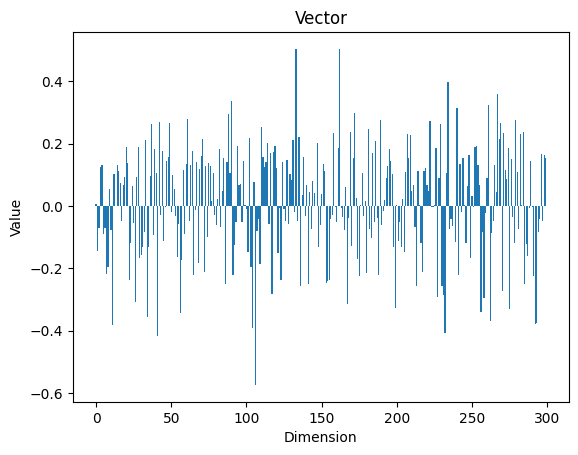

In [4]:
render_vector(vectors_word2vec['queen'])

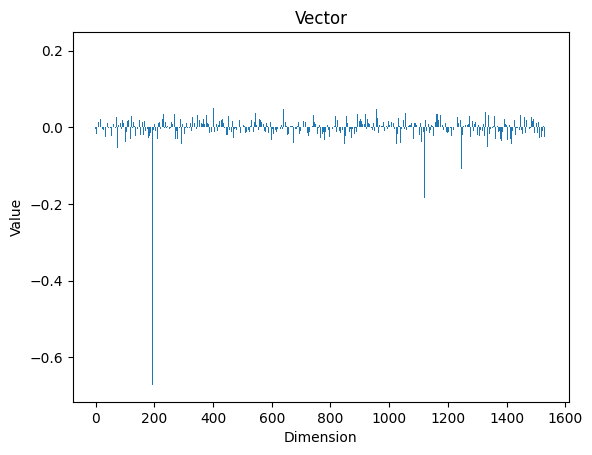

In [5]:
render_vector(vectors_ada['queen'])

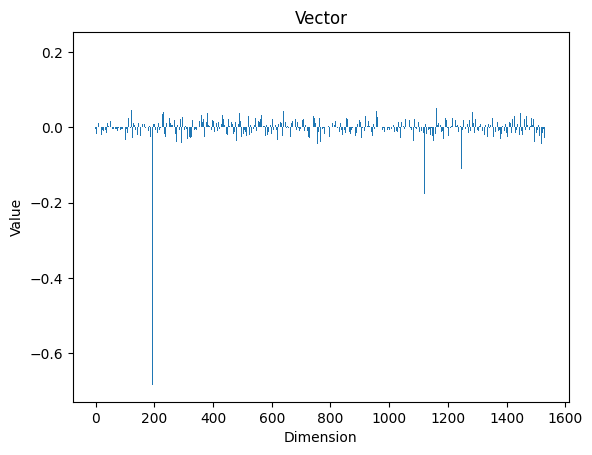

In [6]:
render_vector(vectors_ada['dog'])

## Visualizations with dimensionality reduction

In [7]:
import numpy as np
from sklearn.decomposition import PCA


def perform_pca(vectors: dict):
    """Perform PCA on the word vectors and return the PCA-transformed vectors"""
    X = np.array(list(vectors.values()))
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)
    X_pca = {list(vectors.keys())[i]: X_pca[i] for i in range(len(vectors))}
    return X_pca


vectors_google_pca = perform_pca(vectors_word2vec)
vectors_openai_pca = perform_pca(vectors_ada)

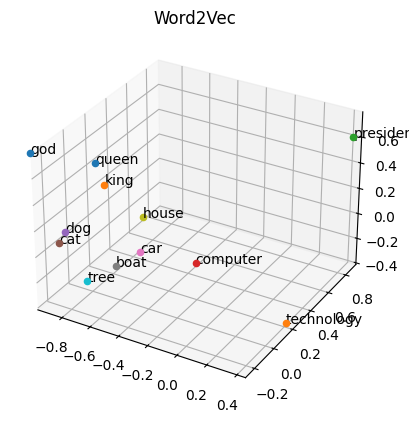

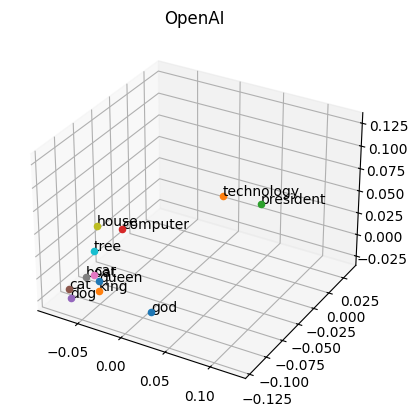

In [8]:
def render_vectors_3d(vectors: dict, title: str):
    """Render 3-dimensional vectors (key: [,,,]) in a 3D plot"""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # Plot the vectors as points
    for key, vector in vectors.items():
        ax.scatter(vector[0], vector[1], vector[2])
        ax.text(vector[0], vector[1], vector[2], key)

    # Figure out the max and min values for each dimension
    min_x = min(v[0] for v in vectors.values())
    max_x = max(v[0] for v in vectors.values())
    min_y = min(v[1] for v in vectors.values())
    max_y = max(v[1] for v in vectors.values())
    min_z = min(v[2] for v in vectors.values())
    max_z = max(v[2] for v in vectors.values())
    ax.set_xlim([min_x, max_x])
    ax.set_ylim([min_y, max_y])
    ax.set_zlim([min_z, max_z])
    ax.set_title(title)
    plt.show()


# Get subset of the vectors for plotting
words = ['queen', 'king', 'president', 'computer', 'dog', 'cat', 'car', 'boat', 'house', 'tree', 'god', 'technology']
word_pca_vectors_google = {word: vectors_google_pca[word] for word in words}
word_pca_vectors_openai = {word: vectors_openai_pca[word] for word in words}


# Plot the vectors
render_vectors_3d(word_pca_vectors_google, 'Word2Vec')
render_vectors_3d(word_pca_vectors_openai, 'OpenAI')

In [9]:
import pandas as pd

def cosine_similarity(v1, v2):
    """Compute the cosine similarity between two vectors"""
    dot_product = sum([a * b for a, b in zip(v1, v2)])
    magnitude = (sum([a**2 for a in v1]) * sum([a**2 for a in v2])) ** 0.5
    return dot_product / magnitude

def most_similar(word: str, vectors: dict) -> list[list]:
    """Return the 10 most similar words and similarities to the given word"""
    word_vector = vectors[word]
    similarities = {w: cosine_similarity(word_vector, vector) for w, vector in vectors.items()}
    most_similar_words = sorted(similarities, key=similarities.get, reverse=True)
    return pd.DataFrame([(word, similarities[word]) for word in most_similar_words[:10]], columns=['word', 'similarity'])

word = 'dog'
most_similar(word, vectors_word2vec)

,word,similarity
0,dog,1.000000
1,cat,0.760946
2,animal,0.643801
3,horse,0.482581
4,bird,0.450441
5,child,0.370100
6,baby,0.356009
7,boy,0.352168
8,woman,0.351105
9,mother,0.345503


In [10]:
most_similar(word, vectors_ada)

,word,similarity
0,dog,1.000000
1,animal,0.885472
2,god,0.865986
3,cat,0.863493
4,fish,0.856640
5,bird,0.855640
6,diet,0.852973
7,horse,0.852069
8,drug,0.850611
9,gun,0.849355


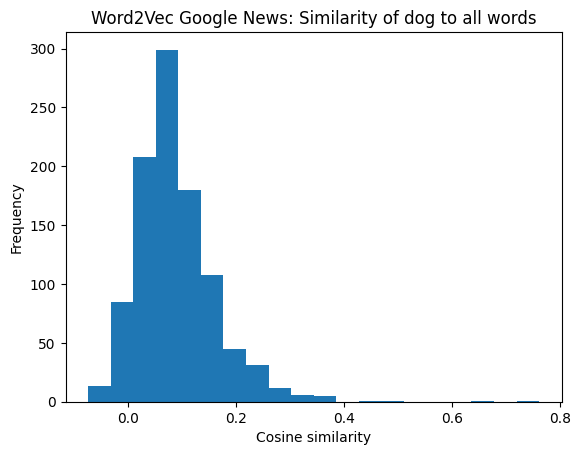

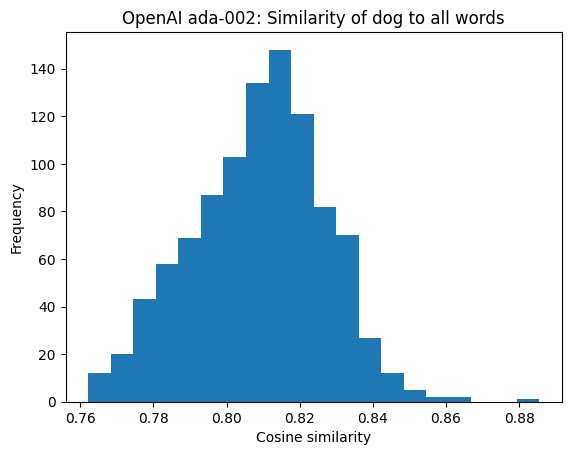

In [11]:
def cosine_similarity_histogram(word: str, vectors: dict, model_name: str):
    """Plot a histogram of the cosine similarities of the word to all other words"""
    word_vector = vectors[word]
    similarities = [cosine_similarity(word_vector, vectors[w]) for w in vectors if w != word]
    plt.hist(similarities, bins=20)
    plt.xlabel('Cosine similarity')
    plt.ylabel('Frequency')
    plt.title(f'{model_name}: Similarity of {word} to all words')
    plt.show()

cosine_similarity_histogram('dog', vectors_word2vec, 'Word2Vec Google News')
cosine_similarity_histogram('dog', vectors_ada, 'OpenAI ada-002')

## Resources

* [Embedding projector](https://projector.tensorflow.org/)
* [Why are Cosine Similarities of Text embeddings almost always positive?](https://vaibhavgarg1982.medium.com/why-are-cosine-similarities-of-text-embeddings-almost-always-positive-6bd31eaee4d5)
* [Expected Angular Differences in Embedding Random Text?](https://community.openai.com/t/expected-angular-differences-in-embedding-random-text/28577)
